<a href="https://colab.research.google.com/github/vifirsanova/hse-python-course/blob/main/%D0%A8%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%B0_%D0%9C%D0%AF%D0%A223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(с) В.И. Фирсанова | Основы программирования на Python, НИУ ВШЭ

Используйте этот шаблон для разработки итогого проекта по курсу "Основы программирования на Python" 2023

Курсивом выделены образцы заполнения шаблона. Эти элементы следует заменить своими данными. Также везде следует заменить код на собственный, однако не воспрещается пользоваться предложенным кодом в качестве референса


# Название проекта: *Анализ тональности в социальных сетях*


## I. Введение
   - Цели и задачи проекта
   - Обзор проекта

Цель проекта: *произвести анализ тональности данных из социальной сети ВКонтакте*

Задачи:

1. *Найти датасет для анализа тональности текста на платформе Kaggle*
2. *Произвести предварительную обработку данных*
3. *Визуализировать распределение тональности в датасете*
4. *Выявить наиболее частотные коллокации*
5. *Использовать алгоритм TF-IDF для создания векторных представлений текста*
6. *Применить готовую модель для анализа тональности из библиотеки TextBLob*
7. *Визуализировать результат обработки на матрице ошибок*
8. *Вывести несколько правильных и ошибочных результатов, чтобы вявить слабые и сильные стороны выбранного алгоритма*

*Результаты проекта могут использоваться в качестве основы для разработки модели машинного обучения для анализа тональности текста.*

## II. Датасет
   - Выбрать, описать и загрузить источник используемых данных

*Датасет выгружен по ссылке [example.com](https://). Данные собирались с помощью ВКонакте API для Python.*


In [6]:
import pandas as pd

data_path = "/content/sentiment.csv"
df = pd.read_csv(data_path)

df.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


Какие данные описаны в датасете?

Здесь можно кратко описать, из каких столбцов состоят ваши данные, какая используется разметка и т.д.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                              --------------  ----- 
 0   3364                                                                                                                                                                                                                                                999 non-null    int64 
 1   Facebook                                                                   

Какие типы данных хранятся в этом датасете?
Какой объем памяти занимают данные?
Какие выводы можно сделать на основе этих фактов?

In [8]:
df.describe()

,3364
count,999.000000
mean,6435.159159
std,3728.912226
min,6.000000
25%,3241.500000
50%,6560.000000
75%,9662.500000
max,13197.000000


Опишите свои данные, назовите средние значения, минимумы и максимумы, общее количество объектов в датасете. Сфокусируйтесь на тех данные, которые могут пригодиться вам для решения вашей задачи.

   - Чистка данных (выбираете то, что подходит для ваших данных, можно использовать как нативные способы, так и библиотеки):
     - Удаление специальных символов, URL, ненужных столбцов
     - Токенизация
     - Лемматизация
     - Стемминг
     - Удаление стоп-слов

In [ ]:
# Удаление пустых ячеек

df.dropna(inplace=True)

In [10]:
# Удаление столбцов, которые не требуются вам для решения задачи

df.drop(['3364'], axis=1, inplace=True)

df.head()

,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
# Изменить названия столбцов

df.rename(columns={'Facebook': 'source', 'Irrelevant': 'label', 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣': 'text'}, inplace=True)
df.head()

,source,label,text
0,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Google,Neutral,Now the President is slapping Americans in the...
4,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [16]:
# Изменить типы данных

df['label'] = df['label'].astype('category')
df['label']

0         Neutral
1        Negative
2        Negative
3         Neutral
4        Negative
          ...    
994    Irrelevant
995    Irrelevant
996      Positive
997      Positive
998       Neutral
Name: label, Length: 999, dtype: category
Categories (4, object): ['Irrelevant', 'Negative', 'Neutral', 'Positive']

In [18]:
# Привести данные к нижнему регистру
# Очистить данные от лищних символов с помощью регулярных выражений

df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]', '', regex=True)
df['text']

0      bbc news  amazon boss jeff bezos rejects claim...
1      microsoft why do i pay for word when it functi...
2      csgo matchmaking is so full of closet hacking ...
3      now the president is slapping americans in the...
4      hi eahelp ive had madeleine mccann in my cella...
                             ...                        
994     toronto is the arts and culture capital of ca...
995    this is actually a good move tot bring more vi...
996    today sucked so its time to drink wine n play ...
997      bought a fraction of microsoft today small wins
998    johnson  johnson to stop selling talc baby pow...
Name: text, Length: 999, dtype: object

   - Разметка (выбираете то, что подходит для ваших данных, можно использовать как нативные способы, так и библиотеки):
     - Частеречная разметка
     - Автоматическая разметка, необходимая для решения вашей задачи
     - Ручная разметка, необходимая для решения вашей задачи

In [21]:
# частеречная разметка с NLTK

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# токенизация

df['Tokens'] = df['text'].apply(nltk.word_tokenize)

# частереная разметка

df['POS_Tags'] = df['Tokens'].apply(nltk.pos_tag)

# извлечение POS-тегов

df['POS'] = df['POS_Tags'].apply(lambda tags: [pos for word, pos in tags])

df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,source,label,text,Tokens,POS_Tags,POS
0,Amazon,Neutral,bbc news amazon boss jeff bezos rejects claim...,"[bbc, news, amazon, boss, jeff, bezos, rejects...","[(bbc, JJ), (news, NN), (amazon, NN), (boss, N...","[JJ, NN, NN, NN, NN, NN, VBZ, NNS, NN, VBD, IN..."
1,Microsoft,Negative,microsoft why do i pay for word when it functi...,"[microsoft, why, do, i, pay, for, word, when, ...","[(microsoft, JJ), (why, WRB), (do, VBP), (i, V...","[JJ, WRB, VBP, VB, NN, IN, NN, WRB, PRP, VBZ, ..."
2,CS-GO,Negative,csgo matchmaking is so full of closet hacking ...,"[csgo, matchmaking, is, so, full, of, closet, ...","[(csgo, NN), (matchmaking, NN), (is, VBZ), (so...","[NN, NN, VBZ, RB, JJ, IN, NN, VBG, PRP$, DT, R..."
3,Google,Neutral,now the president is slapping americans in the...,"[now, the, president, is, slapping, americans,...","[(now, RB), (the, DT), (president, NN), (is, V...","[RB, DT, NN, VBZ, VBG, NNS, IN, DT, NN, IN, PR..."
4,FIFA,Negative,hi eahelp ive had madeleine mccann in my cella...,"[hi, eahelp, ive, had, madeleine, mccann, in, ...","[(hi, NN), (eahelp, NN), (ive, NN), (had, VBD)...","[NN, NN, NN, VBD, JJ, NN, IN, PRP$, NN, IN, DT..."



## III. Предварительный анализ данных
   - Визуализируйте данные с помощью таких графиков, как:
     - коррелограмма,
     - гистограмма,
     - точечная диаграмма,
     - ящик с усами

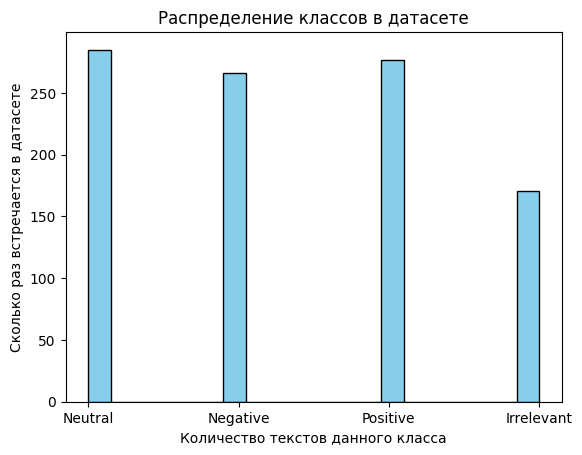

In [24]:
import matplotlib.pyplot as plt

# гистограмма

plt.hist(df['label'], bins=20, color='skyblue', edgecolor='black')

# подписать оси x, y и название гистограммы
plt.xlabel('Количество текстов данного класса')
plt.ylabel('Сколько раз встречается в датасете')
plt.title('Распределение классов в датасете')

# отобразить
plt.show()

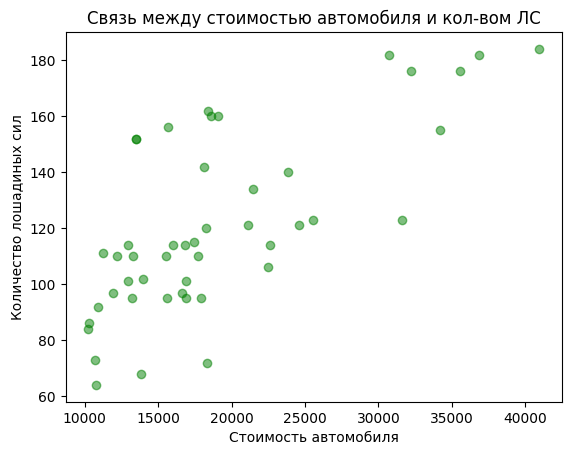

In [ ]:
# точечная диаграмма для датасета об автомобиля строится, чтобы определить наличие связи
# между стоимостью автомобиля и количеством лошадиных сил

plt.scatter(df['price'], df['horsepower'], alpha=0.5, color='green')

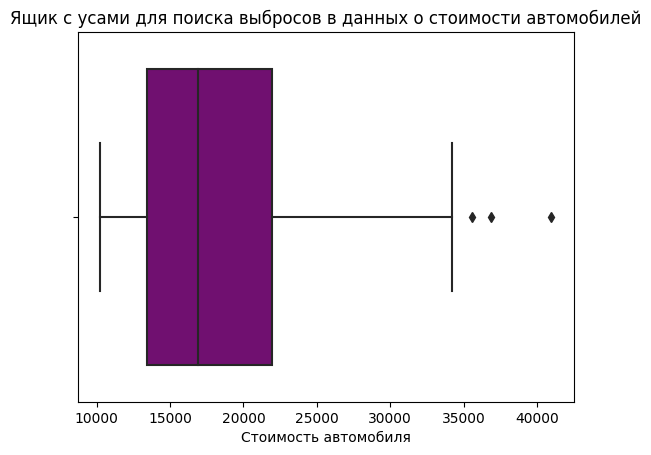

In [ ]:
import seaborn as sns

# Выбросы - это данные, которые сильно отклоняются (гораздо больше или меньше) минимальных или максимальных величин
# Например, у нас в данных самые большие значения равны 90-100, но есть одно или два значения равные 250
# Значения, равные 250, мы назовем выбросами в данных
# Они могут негативно влиять на статистику, например, искажать реальную картинку среднего значения
# Чтобы их найти, можно использовать график "ящик с усами"
# Этот график так назван за внешнее сходство с ящиком, у которого есть антенны

# Создать ящик с усами для столбца со стоимостью автомобиля
sns.boxplot(x=df['price'], color='purple')

<ipython-input-42-fe0c49545096>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


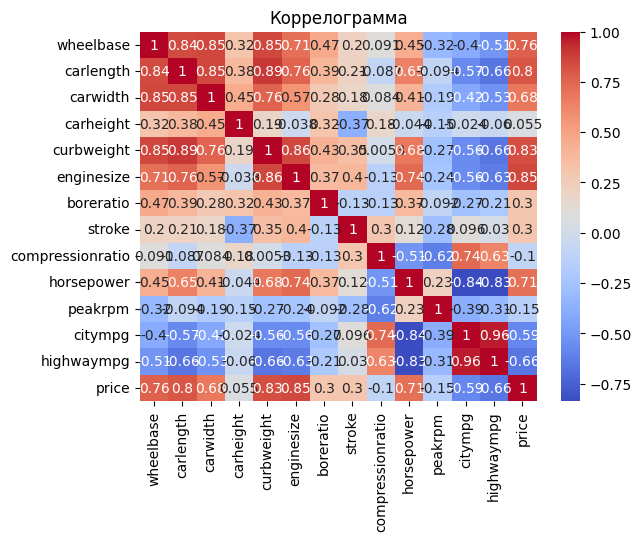

In [ ]:
# Вычислить корреляцию - связи между всеми элементами датасета

correlation_matrix = df.corr()

# Визуализировать связи между всеми элементами датасета
# Чем теплее оттенок, тем сильнее связь, и наоборот

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

Сделайте выводы по каждой выбранной визуализации:
- сбалансированная выборка или нет,
- есть связь или зависимость между выбранными данными или нет,
- возрастает или убывает сила связи,
- есть ли выбросы в данных...

   - Выведите наиболее частотные коллокации и слова (возможные методы):
     - создайте частотные словари,
     - визуализация с помощью облака слов

In [35]:
# пример частотного словаря для одного текста в датасете

data = pd.Series(df['Tokens'][50])

frequency_dict = data.value_counts().to_dict()

frequency_dict

{'a': 3,
 'just': 3,
 'your': 2,
 'of': 2,
 'and': 2,
 'been': 2,
 'game': 2,
 'if': 2,
 'you': 1,
 'or': 1,
 'are': 1,
 'problem': 1,
 'part': 1,
 'year': 1,
 'the': 1,
 'like': 1,
 'red': 1,
 'zones': 1,
 'im': 1,
 '2': 1,
 'not': 1,
 'lagouts': 1,
 'aware': 1,
 'fix': 1,
 'cant': 1,
 'pubg_support': 1,
 'responses': 1,
 'wondering': 1,
 'console': 1,
 'so': 1,
 'whenll': 1,
 'u': 1,
 'be': 1,
 'fixing': 1,
 'fn': 1,
 'asking': 1,
 'hiya': 1,
 'lot': 1,
 'have': 1,
 'very': 1,
 'satisfied': 1,
 'with': 1,
 'lack': 1,
 'thx': 1}

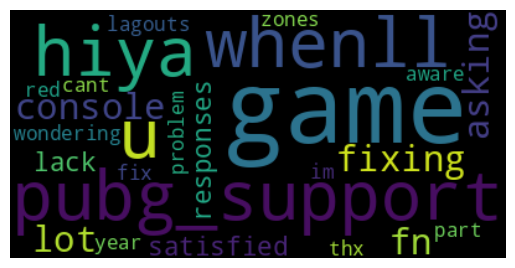

In [36]:
from wordcloud import WordCloud

# облако слов для одного текста

wordcloud = WordCloud().generate(df['text'][50])

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Какие выводы позволяет сделать частотный словарь? Какова практическая значимость такой работы: можно ли создать с ее помощью векторное представление текста, выявить стоп-слова? Что еще можно сделать с частотным словарем и облаком слов?

## IV. Векторное представление
   - Построить любое векторное представление (ориентируйтесь на свой опыт в Python):
     - Bag-of-Words
     - TF-IDF
     - Word2Vec
   - Если с построением векторного представления возникают трудности, выделите такие характеристики текстов:
     - минимальная, максимальная, средняя длина текста в датасете...

In [ ]:
# образец двухмерного (для двух предложений) мешка слов

df1 = pd.DataFrame(glossaries[0], columns=['word', 'sentence 0'])
df2 = pd.DataFrame(glossaries[2], columns=['word', 'sentence 2'])

df = df1.merge(df2, on='word')

df.columns = ['word', 'sentence 0', 'sentence 1']

df

,word,sentence 0,sentence 1
0,sample,2,0
1,website,2,0
2,web,1,0
3,page,1,0
4,welcome,1,0
5,text,1,0
6,consectetur,0,1
7,contact,0,0
8,content,0,0
9,breaking,0,1



## V. Модель NLP
   - Выбрать и применить к данным готовую модель NLP для решения какой-либо задачи:
     - анализ тональности,
     - классификация,
     - суммаризация,
     - разметка именованных сущностей,
     - разметка синтаксиса или частей речи...

In [38]:
# применяем TextBlob для анализа тональности к данным

from textblob import TextBlob

for index, row in df.iterrows():
    text = row['text']
    sentiment = TextBlob(text)

    df.loc[index, 'Polarity'] = sentiment.sentiment.polarity
    df.loc[index, 'Subjectivity'] = sentiment.sentiment.subjectivity

- Оценка результата:
     - данные можно визуализировать (например, с помощью матрицы ошибок) или оценить метриками (например, полнота, точность и F-мера)
     - вы должны обосновать свой выбор визуализации и метрик оценки

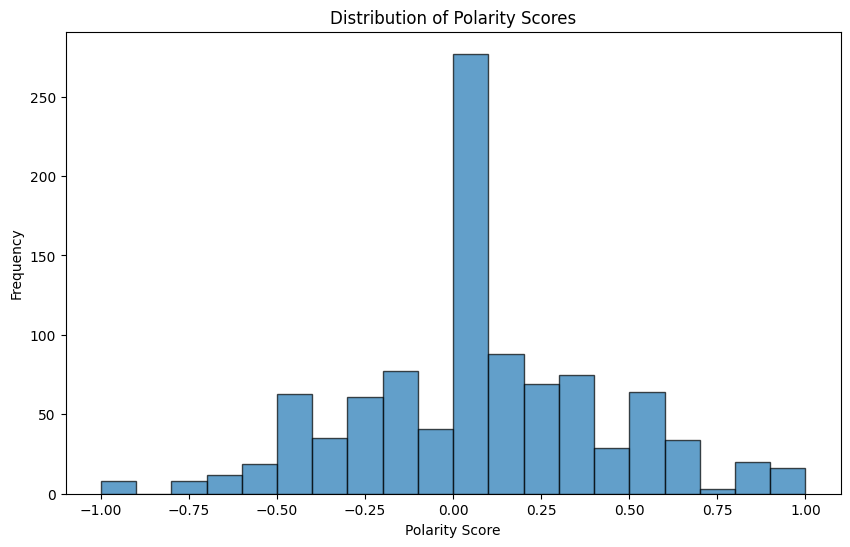

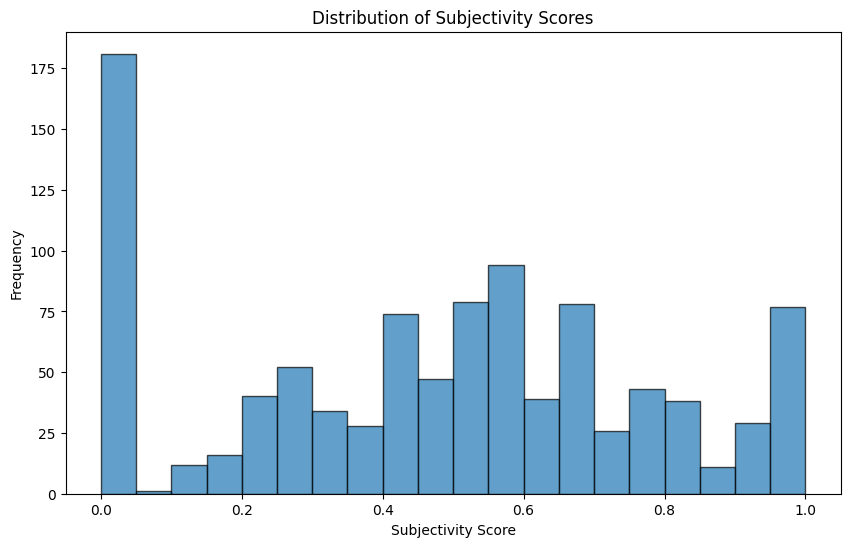

In [41]:
# визуализация результатов работы модели

plt.figure(figsize=(10, 6))

plt.hist(df['Polarity'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Scores')

plt.figure(figsize=(10, 6))

plt.hist(df['Subjectivity'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Subjectivity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Subjectivity Scores')

plt.show()

## VI. Выводы
   - Представьте свои рассуждения о проделанной работе:
     - с какими трудностями вы столкнулись,
     - что нового вы узнали в нашем курсе и в процессе работы над проектом,
     - какие выводы сделали для себя, что открыли, что заберете с собой для будущих работ
   - Перспективы:
     - поделитесь идеями о том, как можно развить ваш проект

## VII. Презентация
   - Будьте готовы к устной презентации:
     - разработайте короткую презентацию (5 слайдов), в которой вы опишете цели, задачи, процесс работы и результаты
   - Иллюстрации:
     - представьте основные выводы, репрезентативные визуализации

## VIII. Загрузка
   - Загрузить код и презентацию в свой репозиторий